In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from pyproj import Geod

In [2]:
df = pd.read_csv('./VF_data/pandemos_tra_tapas_modell.csv')

In [3]:
# Create a directed graph
G = nx.DiGraph()

# Create edges with weights
edge_weights = df.groupby(['loc_id_start', 'loc_id_end']).size().reset_index(name='weight')
for _, row in edge_weights.iterrows():
    G.add_edge(row['loc_id_start'], row['loc_id_end'], weight=row['weight'])

In [4]:
# Determine the threshold for the top 1% most frequent edges
threshold = edge_weights['weight'].quantile(0.99)

# Filter edges based on the threshold
filtered_edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['weight'] >= threshold]

# Create a new graph with only the top 1% most frequent edges
G_top_percent = nx.DiGraph()
G_top_percent.add_edges_from(filtered_edges)

In [5]:
# Filter out self-loops
edges_no_self_loops = [(u, v, d) for u, v, d in G.edges(data=True) if u != v]

# Sort the edges by weight in descending order and select the top 1000
sorted_edges = sorted(edges_no_self_loops, key=lambda x: x[2]['weight'], reverse=True)
top_1000_edges = sorted_edges[:1000]

# Create a new graph with only the top 1000 edges
G_top_1000 = nx.DiGraph()
G_top_1000.add_edges_from(top_1000_edges)

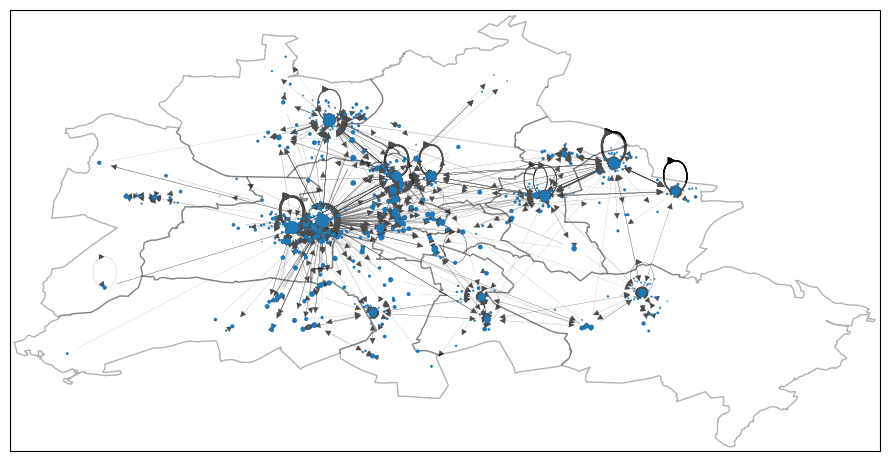

In [6]:
# Filter out self-loops
edges_no_self_loops = [(u, v, d) for u, v, d in G.edges(data=True) if u != v]

# Sort the edges by weight in descending order and select the top 1000
sorted_edges = sorted(edges_no_self_loops, key=lambda x: x[2]['weight'], reverse=True)
top_1000_edges = sorted_edges[:1500]
top_1000_edges

# Create a new graph with only the top 1000 edges
G_top_1000 = nx.DiGraph()
G_top_1000.add_edges_from(top_1000_edges)

# Create df_nodes
grps = df.groupby('loc_id_end')
df_nodes = grps.first()[['lon_end', 'lat_end']]
df_nodes['size'] = grps.size()
df_nodes = df_nodes.loc[np.array(G_top_1000.nodes)]

# Add node attributes for position and size
for node in G_top_1000.nodes():
    if node in df_nodes.index:
        G_top_1000.nodes[node]['pos'] = (df_nodes.loc[node, 'lon_end'], df_nodes.loc[node, 'lat_end'])
        G_top_1000.nodes[node]['size'] = df_nodes.loc[node, 'size']

# Extract node positions and sizes
pos = nx.get_node_attributes(G_top_1000, 'pos')
node_sizes = .001 * np.array([G_top_1000.nodes[node]['size'] for node in G_top_1000.nodes()])
edge_widths = .003 * np.array([d['weight'] for u, v, d in G_top_1000.edges(data=True)])

# Draw the filtered graph
fname = './shape_files/Berlin/bezirksgrenzen.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                edgecolor='black', facecolor='white', alpha=.3)
ax.set_extent([13.085, 13.765, 52.335, 52.68], ccrs.PlateCarree())
nx.draw_networkx_nodes(G_top_1000, pos, node_size=node_sizes, ax=ax)
nx.draw_networkx_edges(G_top_1000, pos, edgelist=G_top_1000.edges(data=True), width=edge_widths, ax=ax)
plt.tight_layout()
plt.savefig('./final_plots_paper/berlin_macro_level_example.pdf', bbox_inches='tight')
pass

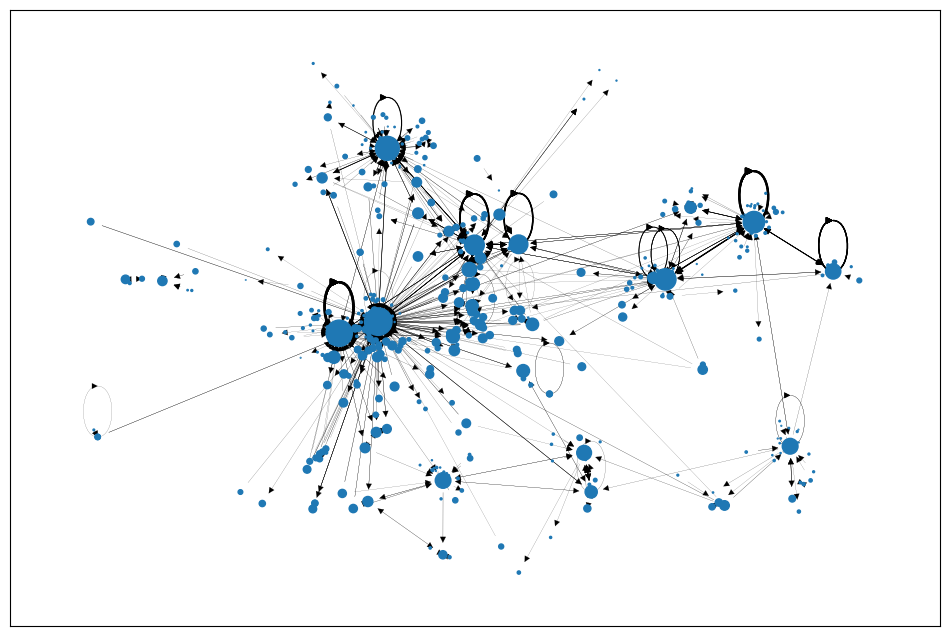

In [61]:
# Create edges with weights
edge_weights = df.groupby(['loc_id_start', 'loc_id_end']).size().reset_index(name='weight')
for _, row in edge_weights.iterrows():
    G.add_edge(row['loc_id_start'], row['loc_id_end'], weight=row['weight'])

# Filter out self-loops
edges_no_self_loops = [(u, v, d) for u, v, d in G.edges(data=True) if u != v]

# Sort the edges by weight in descending order and select the top 1000
sorted_edges = sorted(edges_no_self_loops, key=lambda x: x[2]['weight'], reverse=True)
top_1000_edges = sorted_edges[:1000]

# Create a new graph with only the top 1000 edges
G_top_1000 = nx.DiGraph()
G_top_1000.add_edges_from(top_1000_edges)

# Add node attributes for position and size
for node in G_top_1000.nodes():
    if node in df_nodes.index:
        G_top_1000.nodes[node]['pos'] = (df_nodes.loc[node, 'lon_end'], df_nodes.loc[node, 'lat_end'])
        G_top_1000.nodes[node]['size'] = df_nodes.loc[node, 'size']

# Extract node positions and sizes
pos = nx.get_node_attributes(G_top_1000, 'pos')
node_sizes = 0.005 * np.array([G_top_1000.nodes[node]['size'] for node in G_top_1000.nodes()])
edge_widths = 0.003 * np.array([d['weight'] for u, v, d in G_top_1000.edges(data=True)])

# Draw the filtered graph
fname = './shape_files/Berlin/bezirksgrenzen.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                edgecolor='black', facecolor='white', alpha=.3)
ax.set_extent([13.05, 13.78, 52.3, 52.7], ccrs.PlateCarree())
nx.draw_networkx_nodes(G_top_1000, pos, node_size=node_sizes)
nx.draw_networkx_edges(G_top_1000, pos, edgelist=G_top_1000.edges(data=True), width=edge_widths)

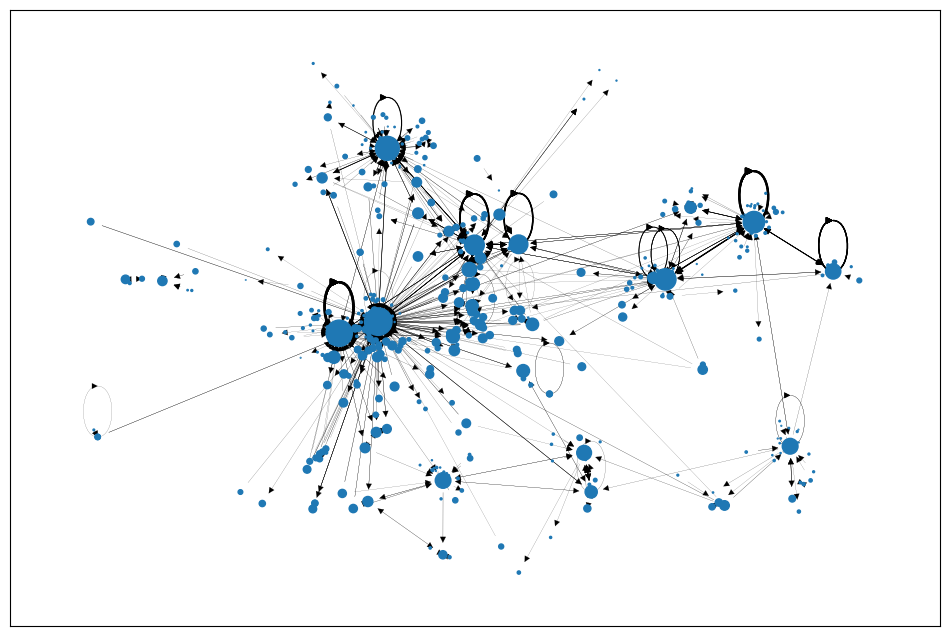

In [57]:
# Add node attributes for position and size
for node in G_top_1000.nodes():
    if node in df_nodes.index:
        G_top_1000.nodes[node]['pos'] = (df_nodes.loc[node, 'lon_end'], df_nodes.loc[node, 'lat_end'])
        G_top_1000.nodes[node]['size'] = df_nodes.loc[node, 'size']

# Extract node positions and sizes
pos = nx.get_node_attributes(G_top_1000, 'pos')
node_sizes = .005 * np.array([G_top_1000.nodes[node]['size'] for node in G_top_1000.nodes()])
edge_widths = .003 * np.array([d['weight'] for u, v, d in G_top_1000.edges(data=True)])

# Draw the filtered graph
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_top_1000, pos, node_size=node_sizes)
nx.draw_networkx_edges(G_top_1000, pos, edgelist=G_top_1000.edges(data=True), width=edge_widths)
#nx.draw_networkx_labels(G_top_1000, pos, font_size=12, font_family='sans-serif')

IndexError: index 285711 is out of bounds for axis 0 with size 486

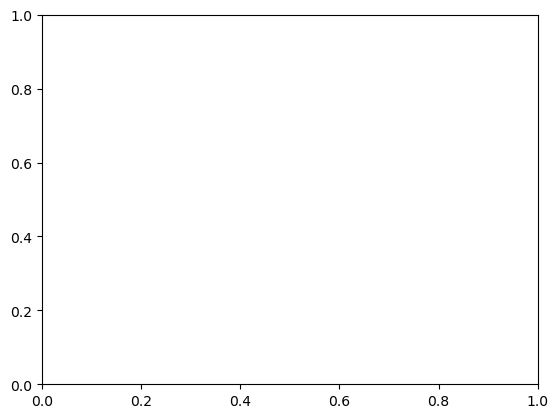

In [38]:
# Draw the filtered graph
#pos = nx.spring_layout(G_top_1000)
#print(pos)
pos = pos_size[:, :2]
node_size = pos_size[:, 2]
edges = G_top_1000.edges(data=True)

# Draw nodes
nx.draw_networkx_nodes(G_top_1000, pos, node_size=1)

# Draw edges with widths proportional to their weights
edge_widths = .001 * np.array([d['weight'] for u, v, d in edges])
nx.draw_networkx_edges(G_top_1000, pos, edgelist=edges, width=edge_widths, label=False)

# Draw node labels
#nx.draw_networkx_labels(G_top_1000, pos, font_size=20, font_family='sans-serif')

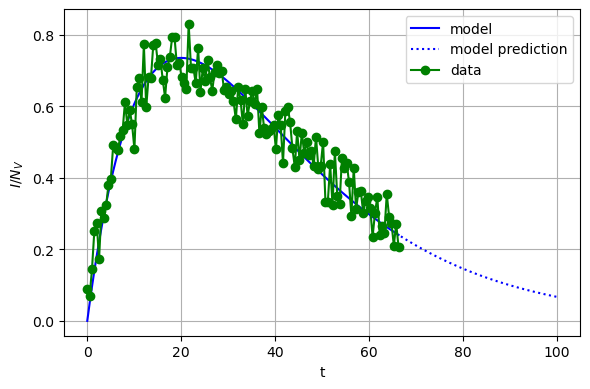

In [18]:
# Generate synthetic SIR-like data
t = np.linspace(0, 100, 200)
I_peak = 0.1 * t * np.exp(-0.05 * t)  # Synthetic curve: rise and fall

# Add noise to mimic real-world data
np.random.seed(0)  # for reproducibility
noise = np.random.normal(0, 0.05, I_peak.shape)
real_world_data = I_peak + noise

# Calculate the index for 2/3 of the time axis
two_thirds_index = len(t) * 2 // 3

# Plotting
plt.figure(figsize=(6, 4))

# Plot the model line (solid for the first 2/3)
plt.plot(t[:two_thirds_index], I_peak[:two_thirds_index], label='model', linestyle='-', color='blue')
# Plot the model prediction line (dotted for the last 1/3)
plt.plot(t[two_thirds_index:], I_peak[two_thirds_index:], label='model prediction', linestyle=':', color='blue')
# Plot the real world data
plt.plot(t[:two_thirds_index], real_world_data[:two_thirds_index], label='data', linestyle='-', marker='o', color='green')

plt.xlabel('t')
plt.ylabel(r'$I/N_V$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('./final_plots_paper/paradigmatic_forecasting.png')


/tmp/ipykernel_244879/1172997059.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


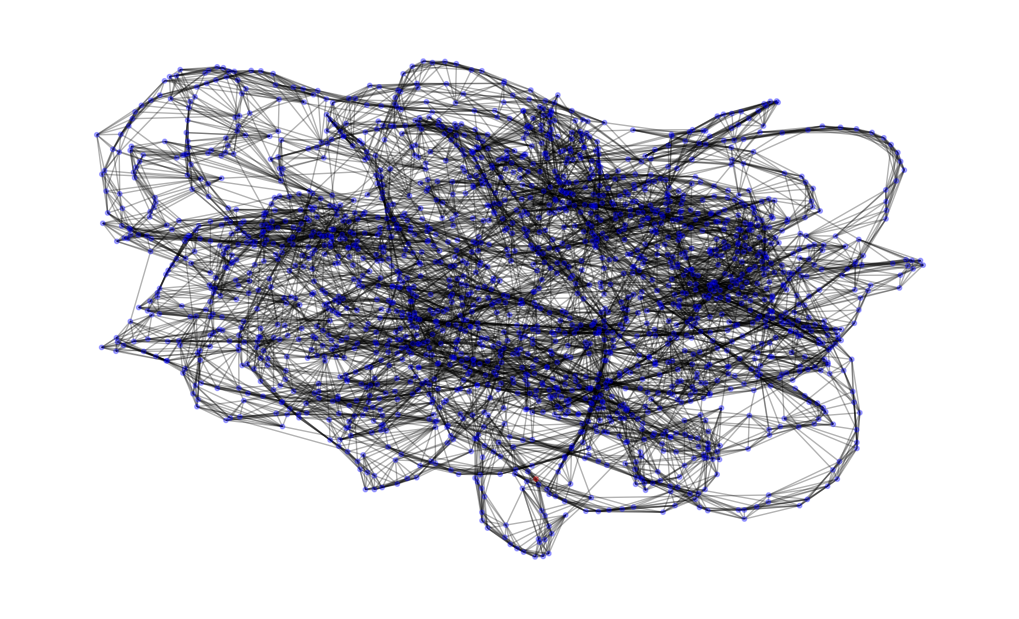

In [37]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Set the number of nodes
Nv = 2000

# Generate a small-world graph
G = nx.watts_strogatz_graph(n=Nv, k=10, p=0.04)
#G = nx.barabasi_albert_graph(n=Nv, m=3)

# Initialize compartments
np.random.seed(0)  # for reproducibility
compartments = np.array(['S'] * Nv)
initial_infected = np.random.choice(Nv)
compartments[initial_infected] = 'I'
compartments_dict = {i: compartments[i] for i in range(Nv)}

# Define colors for compartments
color_map = {'S': 'blue', 'I': 'red', 'R': 'green'}
node_colors = [color_map[compartments_dict[node]] for node in G.nodes()]

# Plotting function to visualize the graph
def plot_graph(G, compartments):
    plt.figure(figsize=(10, 6))
    #plt.title('contact network', y=.95)
    node_colors = [color_map[compartments[node]] for node in G.nodes()]
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=10, font_color='white', alpha=.3)
    
    # Create a legend
    #handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[label], markersize=10) for label in color_map]
    #labels = [label for label in color_map]
    #plt.legend(handles, labels, loc='upper center')
    ax = plt.gca()
    import matplotlib.patches as patches
    rect = patches.Rectangle(
        (0, 0), 1, 1, transform=ax.transAxes, 
        linewidth=2, edgecolor='black', facecolor='none'
    )
    #ax.add_patch(rect)
    
    plt.tight_layout()


# Initial state
#plot_graph(G, compartments_dict, title="Initial State")

# Number of time steps to simulate
n_steps = 0

# Simulation of the spread over n time steps
for _ in range(n_steps):
    new_compartments_dict = compartments_dict.copy()
    for node in G.nodes():
        if compartments_dict[node] == 'I':
            for neighbor in G.neighbors(node):
                if compartments_dict[neighbor] == 'S':
                    if np.random.rand() < 0.2:  # probability of infection
                        new_compartments_dict[neighbor] = 'I'
            if np.random.rand() < 0.1:  # probability of recovery
                new_compartments_dict[node] = 'R'
    compartments_dict = new_compartments_dict

# State after n time steps of the spread
plot_graph(G, compartments_dict)
plt.savefig('./final_plots_paper/paradigmatic_contact_network.png')
